In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [2]:
# Load the IMDB dataset
# Keep only the top 10,000 most frequently occurring words in the training data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
maxlen = 500 # Cuts off reviews after 500 words
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
#use RNN to classify the IMDB dataset
# RNN is good for processing sequence data such as text
#Define the model architecture
rnn_model = Sequential()
rnn_model.add(Embedding(10000, 32)) # Embedding layer, 10000 is the size of the vocabulary, 32 is the dimensionality of the embeddings
rnn_model.add(SimpleRNN(32)) # RNN layer, 32 is the dimensionality of the output space
rnn_model.add(Dense(1, activation='sigmoid')) # Dense layer, 1 is the dimensionality of the output space

# Compile the model with rmsprop optimizer and binary_crossentropy loss function
rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model
rnn_history = rnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 160ms/step - loss: 0.6122 - acc: 0.6557 - val_loss: 0.5584 - val_acc: 0.7132
Epoch 2/10
157/157 [==============================] - 24s 154ms/step - loss: 0.4102 - acc: 0.8245 - val_loss: 0.5248 - val_acc: 0.7626
Epoch 3/10
157/157 [==============================] - 24s 155ms/step - loss: 0.3119 - acc: 0.8744 - val_loss: 0.4127 - val_acc: 0.8406
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2518 - acc: 0.9031 - val_loss: 0.3802 - val_acc: 0.8504
Epoch 5/10
157/157 [==============================] - 25s 161ms/step - loss: 0.1927 - acc: 0.9277 - val_loss: 0.3755 - val_acc: 0.8540
Epoch 6/10
157/157 [==============================] - 23s 145ms/step - loss: 0.1372 - acc: 0.9527 - val_loss: 0.4335 - val_acc: 0.8330
Epoch 7/10
157/157 [==============================] - 24s 154ms/step - loss: 0.0913 - acc: 0.9699 - val_loss: 0.4727 - val_acc: 0.8280
Epoch 8/10
157/157 [==============================] - 2

In [6]:
#loss and accuracy
rnn_loss = rnn_history.history['loss']
rnn_val_loss = rnn_history.history['val_loss']
rnn_acc = rnn_history.history['acc']
rnn_val_acc = rnn_history.history['val_acc']

In [8]:
# Print the loss and accuracy values in percentage
print(f'loss: {rnn_loss[-1]*100:.2f}%')
print(f'val_loss: {rnn_val_loss[-1]*100:.2f}%')
print(f'acc: {rnn_acc[-1]*100:.2f}%')
print(f'val_acc: {rnn_val_acc[-1]*100:.2f}%')

loss: 2.87%
val_loss: 59.59%
acc: 99.22%
val_acc: 85.12%


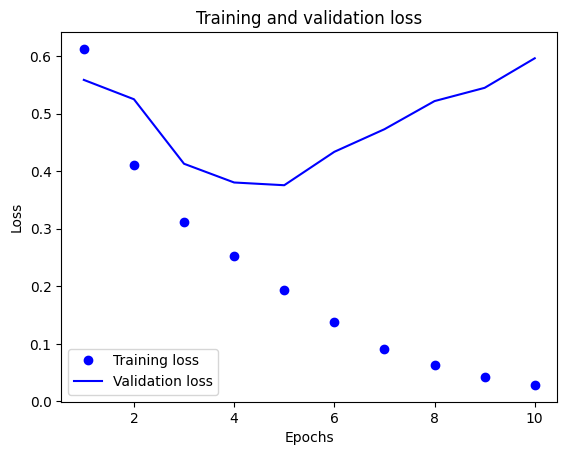

In [9]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(rnn_loss) + 1)
plt.plot(epochs, rnn_loss, 'bo', label='Training loss')
plt.plot(epochs, rnn_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
#use LSTM to classify the IMDB dataset
# LSTM is good for processing sequence data such as text
#Define the model architecture
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(10000, 32)) # Embedding layer, 10000 is the size of the vocabulary, 32 is the dimensionality of the embeddings
lstm_model.add(LSTM(32)) # LSTM layer, 32 is the dimensionality of the output space
lstm_model.add(Dense(1, activation='sigmoid')) # Dense layer, 1 is the dimensionality of the output space

In [11]:
# Compile the model with rmsprop optimizer and binary_crossentropy loss function
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
# Compile the model with rmsprop optimizer and binary_crossentropy loss function
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#MODEL SUMMARY
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Train the model
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 341ms/step - loss: 0.5872 - acc: 0.6820 - val_loss: 0.4579 - val_acc: 0.7924
Epoch 2/10
157/157 [==============================] - 54s 347ms/step - loss: 0.3462 - acc: 0.8609 - val_loss: 0.3042 - val_acc: 0.8750
Epoch 3/10
157/157 [==============================] - 54s 345ms/step - loss: 0.2678 - acc: 0.8953 - val_loss: 0.2945 - val_acc: 0.8862
Epoch 4/10
157/157 [==============================] - 55s 351ms/step - loss: 0.2307 - acc: 0.9105 - val_loss: 0.2980 - val_acc: 0.8708
Epoch 5/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1986 - acc: 0.9277 - val_loss: 0.2981 - val_acc: 0.8770
Epoch 6/10
157/157 [==============================] - 58s 371ms/step - loss: 0.1823 - acc: 0.9325 - val_loss: 0.3527 - val_acc: 0.8610
Epoch 7/10
157/157 [==============================] - 55s 346ms/step - loss: 0.1638 - acc: 0.9406 - val_loss: 0.3472 - val_acc: 0.8828
Epoch 8/10
157/157 [==============================] - 5

In [14]:
#loss and accuracy
lstm_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']
lstm_acc = lstm_history.history['acc']
lstm_val_acc = lstm_history.history['val_acc']

In [15]:
# Print the loss and accuracy values in percentage
print(f'loss: {lstm_loss[-1]*100:.2f}%')
print(f'val_loss: {lstm_val_loss[-1]*100:.2f}%')
print(f'acc: {lstm_acc[-1]*100:.2f}%')
print(f'val_acc: {lstm_val_acc[-1]*100:.2f}%')

loss: 12.13%
val_loss: 42.04%
acc: 95.95%
val_acc: 87.86%


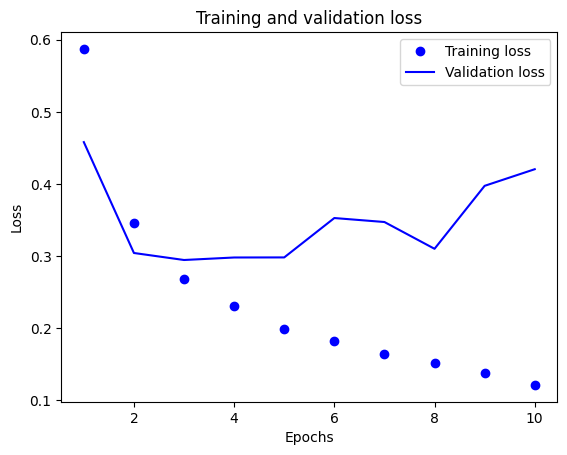

In [16]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(lstm_loss) + 1) # len(lstm_loss) = 10 since we have 10 epochs in the training process above
plt.plot(epochs, lstm_loss, 'bo', label='Training loss')
plt.plot(epochs, lstm_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
#use Bidirectional to classify the IMDB dataset
# Bidirectional is good for processing sequence data such as text
#Define the model architecture

from keras.layers import Bidirectional

bd_model = Sequential()
bd_model.add(Embedding(10000, 32)) # Embedding layer, 10000 is the size of the vocabulary, 32 is the dimensionality of the embeddings
bd_model.add(Bidirectional(LSTM(32))) # Bidirectional LSTM layer, 32 is the dimensionality of the output space
bd_model.add(Dense(1, activation='sigmoid')) # Dense layer, 1 is the dimensionality of the output space

In [18]:
# Compile the model with rmsprop optimizer and binary_crossentropy loss function
bd_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [19]:
#MODEL SUMMARY
bd_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
bd_history = bd_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 105s 642ms/step - loss: 0.6123 - acc: 0.6484 - val_loss: 0.4447 - val_acc: 0.8180
Epoch 2/10
157/157 [==============================] - 97s 621ms/step - loss: 0.3800 - acc: 0.8426 - val_loss: 0.3711 - val_acc: 0.8402
Epoch 3/10
157/157 [==============================] - 98s 625ms/step - loss: 0.2903 - acc: 0.8864 - val_loss: 0.3322 - val_acc: 0.8616
Epoch 4/10
157/157 [==============================] - 97s 620ms/step - loss: 0.2385 - acc: 0.9093 - val_loss: 0.2916 - val_acc: 0.8830
Epoch 5/10
157/157 [==============================] - 106s 677ms/step - loss: 0.2095 - acc: 0.9244 - val_loss: 0.3659 - val_acc: 0.8592
Epoch 6/10
157/157 [==============================] - 103s 660ms/step - loss: 0.1930 - acc: 0.9290 - val_loss: 0.3146 - val_acc: 0.8702
Epoch 7/10
157/157 [==============================] - 102s 654ms/step - loss: 0.1708 - acc: 0.9381 - val_loss: 0.3312 - val_acc: 0.8588
Epoch 8/10
157/157 [==============================]

In [22]:
#loss and accuracy
bd_loss = bd_history.history['loss'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
bd_val_loss = bd_history.history['val_loss'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
bd_acc = bd_history.history['acc'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
bd_val_acc = bd_history.history['val_acc'] # history is a dictionary with keys: loss, acc, val_loss, val_acc

In [23]:
# Print the loss and accuracy values in percentage
print(f'loss: {bd_loss[-1]*100:.2f}%')
print(f'val_loss: {bd_val_loss[-1]*100:.2f}%')
print(f'acc: {bd_acc[-1]*100:.2f}%')
print(f'val_acc: {bd_val_acc[-1]*100:.2f}%')

loss: 13.54%
val_loss: 37.40%
acc: 95.24%
val_acc: 88.22%


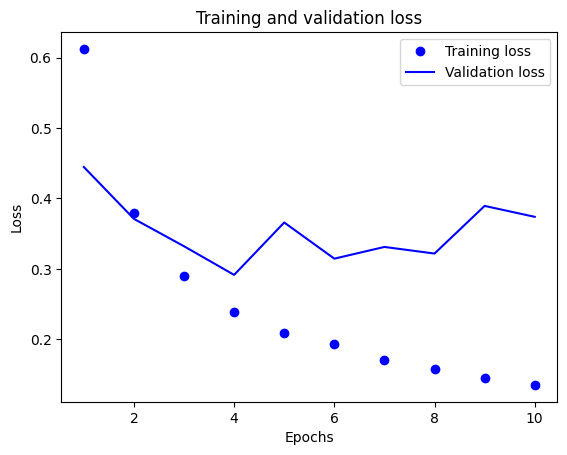

In [24]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(bd_loss) + 1) # len(bd_loss) = 10 since we have 10 epochs in the training process above
plt.plot(epochs, bd_loss, 'bo', label='Training loss')
plt.plot(epochs, bd_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#use GRU to classify the IMDB dataset
# GRU is good for processing sequence data such as text
#Define the model architecture
from keras.layers import GRU

gru_model = Sequential()
gru_model.add(Embedding(10000, 32)) # Embedding layer, 10000 is the size of the vocabulary, 32 is the dimensionality of the embeddings
gru_model.add(GRU(32)) # GRU layer, 32 is the dimensionality of the output space
gru_model.add(Dense(1, activation='sigmoid')) # Dense layer, 1 is the dimensionality of the output space

In [26]:
# Compile the model with rmsprop optimizer and binary_crossentropy loss function
gru_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
#MODEL SUMMARY
gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Train the model
gru_history = gru_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 354ms/step - loss: 0.6442 - acc: 0.6150 - val_loss: 0.4611 - val_acc: 0.7828
Epoch 2/10
157/157 [==============================] - 52s 329ms/step - loss: 0.3800 - acc: 0.8320 - val_loss: 0.3809 - val_acc: 0.8330
Epoch 3/10
157/157 [==============================] - 52s 334ms/step - loss: 0.2879 - acc: 0.8831 - val_loss: 0.3656 - val_acc: 0.8436
Epoch 4/10
157/157 [==============================] - 53s 335ms/step - loss: 0.2501 - acc: 0.9026 - val_loss: 0.3896 - val_acc: 0.8218
Epoch 5/10
157/157 [==============================] - 54s 346ms/step - loss: 0.2143 - acc: 0.9186 - val_loss: 0.3217 - val_acc: 0.8704
Epoch 6/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1985 - acc: 0.9257 - val_loss: 0.3615 - val_acc: 0.8620
Epoch 7/10
157/157 [==============================] - 53s 339ms/step - loss: 0.1793 - acc: 0.9344 - val_loss: 0.3317 - val_acc: 0.8700
Epoch 8/10
157/157 [==============================] - 5

In [29]:
#loss and accuracy
gru_loss = gru_history.history['loss'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
gru_val_loss = gru_history.history['val_loss'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
gru_acc = gru_history.history['acc'] # history is a dictionary with keys: loss, acc, val_loss, val_acc
gru_val_acc = gru_history.history['val_acc'] # history is a dictionary with keys: loss, acc, val_loss, val_acc

In [30]:
# Print the loss and accuracy values in percentage
print(f'loss: {gru_loss[-1]*100:.2f}%')
print(f'val_loss: {gru_val_loss[-1]*100:.2f}%')
print(f'acc: {gru_acc[-1]*100:.2f}%')
print(f'val_acc: {gru_val_acc[-1]*100:.2f}%')

loss: 14.04%
val_loss: 33.79%
acc: 95.03%
val_acc: 87.22%


<ipython-input-31-09fdd9db8dd3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, gru_loss, 'bo', label='Training loss', color='red')
<ipython-input-31-09fdd9db8dd3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, gru_val_loss, 'b', label='Validation loss', color='blue')


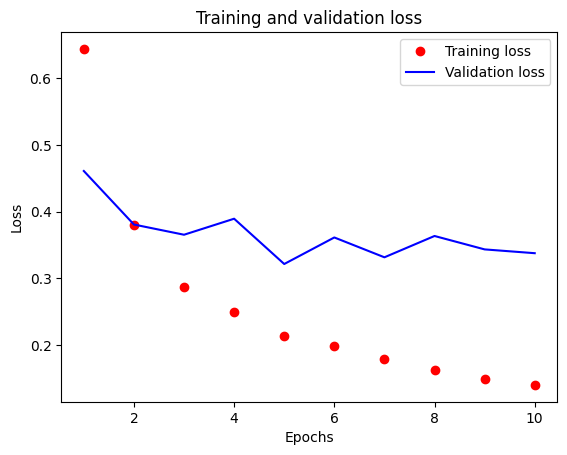

In [31]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(gru_loss) + 1) # len(gru_loss) = 10 since we have 10 epochs in the training process above
plt.plot(epochs, gru_loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, gru_val_loss, 'b', label='Validation loss', color='blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Висновки:
RNN: Точність - 85.12%

LSTM: Точність - 87.86%

**Bidirectional: Точність - 88.22%**

GRU: Точність - 87.22%

Bidirectional - найефективніша модель